<a href="https://colab.research.google.com/github/lingzix/stock/blob/master/invest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def fetch_stock (start, end, target):
  stock=investpy.stocks.get_stock_historical_data(stock=target, country='united states', from_date=start, to_date=end, as_json=False, order='ascending', interval='Daily')
  stock.drop(columns=['Currency'],inplace=True)




  sp500 = investpy.get_index_historical_data(index='S&P 500',country='united states',from_date=start,to_date=end)
  sp500.drop(columns=['Currency','Volume'],inplace=True)
  sp500=sp500.add_prefix('sp500'  )
  result=pd.merge(sp500,stock,how='inner',left_index=True,right_index=True)
  return result


In [ ]:
result=fetch_stock('05/03/2000','22/03/2020','AAPL')
result

,sp500Open,sp500High,sp500Low,sp500Close,Open,High,Low,Close,Volume
Date,,,,,,,,,
2006-01-04,1268.80,1275.37,1267.74,1273.46,10.73,10.85,10.64,10.71,155225760
2006-01-05,1273.46,1276.91,1270.30,1273.48,10.69,10.70,10.54,10.63,112396192
2006-01-06,1273.48,1286.09,1273.48,1285.45,10.75,10.96,10.65,10.90,176139504
2006-01-09,1285.45,1290.78,1284.82,1290.15,10.96,11.03,10.82,10.86,168861392
2006-01-10,1290.15,1290.15,1283.76,1289.69,10.89,11.70,10.83,11.55,570088832
...,...,...,...,...,...,...,...,...,...
2020-03-16,2508.59,2562.98,2380.94,2386.13,241.95,259.08,240.00,242.21,80605864
2020-03-17,2425.66,2553.93,2367.04,2529.19,247.51,257.61,238.40,252.86,81013968
2020-03-18,2436.50,2453.57,2280.52,2398.10,240.19,249.91,237.12,246.67,75058408


In [ ]:
total.to_pickle('big_from2010_wo_crypto_volume.pkl')
!cp big_from2010_wo_crypto_volume.pkl /gdrive/'My Drive'/investing_db/

In [ ]:
def fetch_sp500 (start, end):
  numberOfDays = 4
  firstDate = datetime.datetime.strptime(start, "%d/%m/%Y")
  lastDate = firstDate + datetime.timedelta(days=numberOfDays-1)
  sp500 = investpy.get_index_historical_data(index='S&P 500',country='united states',from_date=firstDate.strftime("%d/%m/%Y"),to_date=lastDate.strftime("%d/%m/%Y"))
  close = float(sp500.iloc[-1]['Close'])
  sp500_close = pd.DataFrame({'date': [0], 'close': [close]}) 
  lastDate = datetime.datetime.strptime(end, "%d/%m/%Y")
  startdate = firstDate + datetime.timedelta(days=numberOfDays)
  startdatelist = []
  enddatelist = []

  while startdate <= lastDate:
    enddate = startdate + datetime.timedelta(days=numberOfDays - 1)
    startdatelist.append(startdate.strftime("%d/%m/%Y"))
    if enddate > lastDate: 
      enddate = lastDate
    if enddate == startdate:
      enddate = startdate +datetime.timedelta(days=1)

    enddatelist.append(enddate.strftime("%d/%m/%Y"))
    startdate = enddate + datetime.timedelta(days=1)

  for i in range(len(startdatelist)):
    startdate=startdatelist[i]
    enddate=enddatelist[i]
    try:
      sp500 = investpy.get_index_historical_data(index='S&P 500',country='united states',from_date=startdate,to_date=enddate)
    except:
      continue
    else:
      close = float(sp500.iloc[-1]['Close']) 
      sp500_close = sp500_close.append(pd.DataFrame({'date': [i+1], 'close': [close]}))
  sp500_close.drop_duplicates(inplace=True)
  return sp500_close


In [ ]:
df=investpy.stocks.get_stocks_list(country='united states')
'SP' in df

In [ ]:
!pip install investpy
import numpy as np
import datetime
import investpy
import pandas as pd

     |████████████████████████████████| 4.4MB 3.4MB/s 
     |████████████████████████████████| 245kB 40.5MB/s 
     |████████████████████████████████| 5.8MB 44.9MB/s 
  Created wheel for investpy: filename=investpy-0.9.14-cp36-none-any.whl size=4469457 sha256=1333a9ff7d95c605723c671c549ad7eea207bc595acec8639b370dd4f79b3608
  Stored in directory: /root/.cache/pip/wheels/86/35/ee/fc38f22f1353037b5118cff64b62aeed42f63f2c84135eaaaa
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
def fetch_3rd(start,date,iex):
  firstDate = datetime.datetime.strptime(start, "%d/%m/%Y")
  lastDate = firstDate + datetime.timedelta(days=2)
 # crypto=investpy.get_crypto_historical_data(crypto='bitcoin', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"),as_json=False, order='ascending', interval='Daily')
 # crypto.drop(columns=['Currency'],inplace=True)
 # crypto['crypto_mean']=(crypto['Open']+crypto['Close']+crypto['Low']+crypto['High'])/4
 # crypto=crypto[['crypto_mean']]


  eur=investpy.get_currency_cross_historical_data(currency_cross='EUR/USD', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"))
  eur.drop(columns=['Currency'],inplace=True)
  eur['eur_mean']=(eur['Open']+eur['Close']+eur['Low']+eur['High'])/4
  eur=eur[['eur_mean']]


  jpy=investpy.get_currency_cross_historical_data(currency_cross='JPY/USD', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"))
  jpy.drop(columns=['Currency'],inplace=True)
  jpy['jpy_mean']=(jpy['Open']+jpy['Close']+jpy['Low']+jpy['High'])/4
  jpy=jpy[['jpy_mean']]


  cny=investpy.get_currency_cross_historical_data(currency_cross='CNY/USD', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"))
  cny.drop(columns=['Currency'],inplace=True)
  cny['cny_mean']=(cny['Open']+cny['Close']+cny['Low']+cny['High'])/4
  cny=cny[['cny_mean']]


  gold=investpy.commodities.get_commodity_historical_data(commodity='gold', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"))
  gold.drop(columns=['Currency'],inplace=True)
  gold['gold_mean']=(gold['Open']+gold['Close']+gold['Low']+gold['High'])/4
  gold=gold[['gold_mean']]


  currencies=pd.concat([eur,jpy,cny,gold], axis=1)
  #currencies=pd.concat([crypto,eur,jpy,cny,gold], axis=1)
  spv=investpy.indices.get_index_historical_data(index='S&P 500', country='united states', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"))
  spv['spv_mean']=(spv['Open']+spv['Close']+spv['Low']+spv['High'])/4
  spv=spv[['spv_mean']]

  vix=investpy.indices.get_index_historical_data(index='S&P 500 VIX', country='united states', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"))
  vix['vix_mean']=(vix['Open']+vix['Close']+vix['Low']+vix['High'])/4
  vix=vix[['vix_mean']]

#  grt=investpy.indices.get_index_historical_data(index='S&P 500 Growth Total Return', country='united states', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"))
#  grt['grt_mean']=(grt['Open']+grt['Close']+grt['Low']+grt['High'])/4
#  grt=grt[['grt_mean']]

 # pv=investpy.indices.get_index_historical_data(index='S&P500 Pure Value', country='united states', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"))
 # pv['pv_mean']=(pv['Open']+pv['Close']+pv['Low']+pv['High'])/4
 # pv=pv[['pv_mean']]

 # pg=investpy.indices.get_index_historical_data(index='S&P500 Pure Growth', country='united states', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"))
 # pg['pg_mean']=(pg['Open']+pg['Close']+pg['Low']+pg['High'])/4
 # pg=pg[['pg_mean']]

  gsc=investpy.indices.get_index_historical_data(index='S&P Goldman Sachs Commodity', country='united states', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"))
  gsc['gsc_mean']=(gsc['Open']+gsc['Close']+gsc['Low']+gsc['High'])/4
  gsc=gsc[['gsc_mean']]

#  bos=investpy.indices.get_index_historical_data(index='CBOE Binary Options S&P 500', country='united states', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"))
#  bos['bos_mean']=(bos['Open']+bos['Close']+bos['Low']+bos['High'])/4
#  bos=bos[['bos_mean']]

#  ew=investpy.indices.get_index_historical_data(index='S&P500 Equal Weighted', country='united states', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"))
#  ew['ew_mean']=(ew['Open']+ew['Close']+ew['Low']+ew['High'])/4
#  ew=ew[['ew_mean']]

#  buy=investpy.indices.get_index_historical_data(index='CBOE S&P 500 BuyWrite', country='united states', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"))
#  buy['buy_mean']=(buy['Open']+buy['Close']+buy['Low']+buy['High'])/4
#  buy=buy[['buy_mean']]
#
#  put=investpy.indices.get_index_historical_data(index='CBOE S&P 500 PutWrite', country='united states', from_date=firstDate.strftime("%d/%m/%Y"), to_date=lastDate.strftime("%d/%m/%Y"))
#  put['put_mean']=(put['Open']+put['Close']+put['Low']+put['High'])/4
#  put=put[['put_mean']]

  indecies=pd.concat([spv,vix,gsc], axis=1)
  #indecies=pd.concat([spv,vix,pv,pg,gsc,bos,ew,buy,put], axis=1)
  result=pd.merge(currencies,indecies,how='inner',left_index=True,right_index=True)


  #result=pd.merge(result,iex,how='inner',left_index=True,right_index=True)
  result=result[:1]
  result['date']=date

  return result

  

In [ ]:
def fetch_facts(start,end,iex):

  numberOfDays = 4
  facts=fetch_3rd(start,0,iex)
  firstDate = datetime.datetime.strptime(start, "%d/%m/%Y")
  lastDate = datetime.datetime.strptime(end, "%d/%m/%Y")
  startdate = firstDate + datetime.timedelta(days=numberOfDays)
  startdatelist = []
  enddatelist = []

  while startdate <= lastDate:
    enddate = startdate + datetime.timedelta(days=numberOfDays - 1)
    startdatelist.append(startdate.strftime("%d/%m/%Y"))
    if enddate > lastDate: 
      enddate = lastDate
    if enddate == startdate:
      enddate = startdate +datetime.timedelta(days=1)

    enddatelist.append(enddate.strftime("%d/%m/%Y"))
    startdate = enddate + datetime.timedelta(days=1)

  for i in range(len(startdatelist)):
    startdate=startdatelist[i]
    enddate=enddatelist[i]
    try:
      new_fact=fetch_3rd(startdate,i+1,iex)
    except:
      continue
    else:
      facts = facts.append(new_fact)
  facts.drop_duplicates(inplace=True)
  return facts


In [ ]:
def fetch_sp500 (start, end):
  numberOfDays = 4
  firstDate = datetime.datetime.strptime(start, "%d/%m/%Y")
  lastDate = firstDate + datetime.timedelta(days=numberOfDays-1)
  sp500 = investpy.get_index_historical_data(index='S&P 500',country='united states',from_date=firstDate.strftime("%d/%m/%Y"),to_date=lastDate.strftime("%d/%m/%Y"))
  change = (float(sp500.iloc[-1]['Close']) - float(sp500.iloc[0]['Open']))/float(sp500.iloc[0]['Open'])
  sp500_change = pd.DataFrame({'date': [0], 'change': [change]}) 
  lastDate = datetime.datetime.strptime(end, "%d/%m/%Y")
  startdate = firstDate + datetime.timedelta(days=numberOfDays)
  startdatelist = []
  enddatelist = []

  while startdate <= lastDate:
    enddate = startdate + datetime.timedelta(days=numberOfDays - 1)
    startdatelist.append(startdate.strftime("%d/%m/%Y"))
    if enddate > lastDate: 
      enddate = lastDate
    if enddate == startdate:
      enddate = startdate +datetime.timedelta(days=1)

    enddatelist.append(enddate.strftime("%d/%m/%Y"))
    startdate = enddate + datetime.timedelta(days=1)

  for i in range(len(startdatelist)):
    startdate=startdatelist[i]
    enddate=enddatelist[i]
    try:
      sp500 = investpy.get_index_historical_data(index='S&P 500',country='united states',from_date=startdate,to_date=enddate)
    except:
      continue
    else:
      change = (float(sp500.iloc[-1]['Close']) - float(sp500.iloc[0]['Open']))/float(sp500.iloc[0]['Open'])
      sp500_change = sp500_change.append(pd.DataFrame({'date': [i+1], 'change': [change]}))
  sp500_change.drop_duplicates(inplace=True)
  return sp500_change


In [ ]:

iex_sp=pd.read_pickle('./iex_sp.pkl')
iex_sp=iex_sp[['volume']]
iex_sp=iex_sp.add_prefix('sp500')

result=pd.merge(result,iex_sp,how='inner',left_index=True,right_index=True)
result

In [ ]:
iex_sp=pd.read_pickle('./iex_sp.pkl')
iex_sp.iloc[0]

In [ ]:
def fetch_news (start, end):
  numberOfDays = 4
  firstDate = datetime.datetime.strptime(start, "%d/%m/%Y")
  lastDate = firstDate + datetime.timedelta(days=numberOfDays-1)
  news = investpy.news.get_calendar(time_zone='GMT -5:00', time_filter='time_only',from_date=firstDate.strftime("%d/%m/%Y"),importances=['high','medium'],to_date=lastDate.strftime("%d/%m/%Y"),countries=['united states'])
  news['date']=0
  lastDate = datetime.datetime.strptime(end, "%d/%m/%Y")
  startdate = firstDate + datetime.timedelta(days=numberOfDays)
  startdatelist = []
  enddatelist = []

  while startdate <= lastDate:
    enddate = startdate + datetime.timedelta(days=numberOfDays - 1)
    startdatelist.append(startdate.strftime("%d/%m/%Y"))
    if enddate > lastDate: 
      enddate = lastDate
    if enddate == startdate:
      enddate = startdate +datetime.timedelta(days=1)

    enddatelist.append(enddate.strftime("%d/%m/%Y"))
    startdate = enddate + datetime.timedelta(days=1)

  for i in range(len(startdatelist)):
    startdate=startdatelist[i]
    enddate=enddatelist[i]
    
    cur_news=investpy.news.get_calendar(time_zone='GMT -5:00', time_filter='time_only',importances=['high','medium'],from_date=startdate, to_date=enddate,countries=['united states'])
    if len(cur_news)>=190:
           print(startdate+'\t\t'+enddate)
    cur_news['date']=i+1
    news=news.append(cur_news)
    try:
      sp500_data = investpy.get_index_historical_data(index='S&P 500',country='united states',from_date=startdate,to_date=enddate)
    except:
      continue
    else:
      sp500_open=sp500_data.iloc[0]['Open']
      sp500_volume=sp500_data.iloc[0]['Volume']
      sp500_entry = pd.DataFrame({'date':[i+1], 
                    'event':['sp500open'],  
                    'actual':[sp500_open]}) 
      news=news.append(sp500_entry)
  news=news[['date','event','actual','forecast','previous']]
  news.drop_duplicates(inplace=True)
  return news


In [ ]:
def convert_si_to_number(x):

    if x=='None' or x==None:
      return None
    if type(x)==float:
      return x;
    if ',' in x:
      x=x.replace(',','') # removing ,
    if 'K' in x:
        if len(x) > 1:
            total_stars = float(x.replace('K', '')) * 1000 # convert k to a thousand
    elif 'k' in x:
        if len(x) > 1:
            total_stars = float(x.replace('k', '')) * 1000 # convert k to a thousand
    elif 'M' in x:
        if len(x) > 1:
            total_stars = float(x.replace('M', '')) * 1000000 # convert M to a million
    elif 'm' in x:
        if len(x) > 1:
            total_stars = float(x.replace('m', '')) * 1000000 # convert M to a million
    elif 'B' in x:
        total_stars = float(x.replace('B', '')) * 1000000000 # convert B to a Billion
    elif 'b' in x:
        total_stars = float(x.replace('b', '')) * 1000000000 # convert B to a Billion

    elif '%' in x:
        total_stars = float(x.replace('%',''))/100
    else:
        total_stars = float(x) # Less than 1000
    
    return total_stars

In [ ]:
def remove_braket(news):
  import re
  news=re.sub(r"\(.*\)",'',news)
  news=re.sub(r"\W",'',news)
  return news
print(remove_braket('Existing Home Sales (Dec)'))

the exception handling is needed because you cannot apply functions to the Nontype

In [ ]:
def convert_to_number(news):
  try:
    news['actual']=news['actual'].apply(convert_si_to_number)
    news['forecast']=news['forecast'].apply(convert_si_to_number)/news['actual']
    news['previous']=news['previous'].apply(convert_si_to_number)/news['actual']
  except AttributeError:
    return None

In [ ]:
def process(news):
  news['event']=news['event'].apply(remove_braket)
  convert_to_number(news)
  news.dropna(subset=['actual'],inplace=True)
  news=pd.melt(news, id_vars=['date', 'event'], value_vars=['actual', 'forecast', 'previous'])
  news.sort_values(by=['date', 'event'],inplace=True)
  news["event_variable"] = news["event"] + news["variable"]
  news=news[['date','event_variable','value']]
  news.drop_duplicates(inplace=True, subset=['date','event_variable'])
  news=news.reset_index().pivot('date', 'event_variable', 'value').reset_index()
  news.columns.name=None
  news.drop(columns=['sp500openforecast',	'sp500openprevious'],inplace=True)
  return news



In [ ]:
def fetch_data(start, end, iex):
  facts=fetch_facts(start,end,iex)
  news=fetch_news(start, end)
  sp500=fetch_sp500(start, end)
  news=process(news)
  total=pd.merge(sp500,news,on=['date'])
  total=pd.merge(total,facts,on=['date'])
  return total


In [ ]:
total

In [ ]:
total=fetch_data('05/05/2010','22/03/2020',iex_sp)

In [ ]:
sp500_close =  fetch_sp500('05/05/2015','22/03/2020')

In [ ]:
total

In [ ]:
total.to_pickle('big_from2015may.pkl')
!cp big_from2015may.pkl /gdrive/'My Drive'/investing_db/

In [ ]:
data=fetch_data('01/01/2010','22/03/2020')


In [ ]:
data.drop(data.index[0],inplace=True)
data.to_pickle('news_4days_wsp.pkl')
!cp news_4days_wsp.pkl /gdrive/'My Drive'/investing_db/

In [ ]:
sp500=fetch_sp500('01/03/2010','22/03/2020')
news=fetch_news('01/03/2010','22/03/2020')

In [ ]:
sp500.to_pickle('raw_sp500.pkl')
news.to_pickle('raw_news.pkl')

In [ ]:
!cp raw_news.pkl /gdrive/'My Drive'/investing_db/
!cp raw_sp500.pkl /gdrive/'My Drive'/investing_db/

In [ ]:
!ls /gdrive/'My Drive'/investing_db/

In [ ]:
sp500=fetch_sp500('01/03/2010','22/03/2020')

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
!cp /gdrive/'My Drive'/investing_db/news_01032010_22032020.pkl ./data.pkl

In [ ]:
!cp /gdrive/'My Drive'/investing_db/iex_sp.pkl ./iex_sp.pkl

In [ ]:
!cp /gdrive/'My Drive'/investing_db/news_4days_wsp.pkl ./data.pkl

In [ ]:
!cp /gdrive/'My Drive'/investing_db/big_from2015may.pkl ./data.pkl

In [ ]:

!cp /gdrive/'My Drive'/investing_db/appl_pe.csv ./appl_pe.csv
!cp /gdrive/'My Drive'/investing_db/aapl_rev.csv ./appl_rev.csv

In [ ]:
aapl_pe=pd.read_csv('appl_pe.csv',infer_datetime_format=True,keep_date_col=True)
aapl_pe.set_index('date',inplace=True)
result=pd.merge(result,aapl_pe,how='outer',left_index=True,right_index=True)
result
aapl_rev=pd.read_csv('appl_rev.csv',infer_datetime_format=True,keep_date_col=True)
aapl_rev.set_index('date',inplace=True)
result=pd.merge(result,aapl_rev,how='outer',left_index=True,right_index=True)
result=result['2006-01-04':]

,sp500Open,sp500High,sp500Low,sp500Close,Open,High,Low,Close,Volume,eps,pe,rev
2005-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3243.0
2005-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3520.0
2005-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3678.0
2005-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5749.0
2006-01-04,1268.80,1275.37,1267.74,1273.46,10.73,10.85,10.64,10.71,155225760.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-17,2425.66,2553.93,2367.04,2529.19,247.51,257.61,238.40,252.86,81013968.0,NaN,NaN,NaN
2020-03-18,2436.50,2453.57,2280.52,2398.10,240.19,249.91,237.12,246.67,75058408.0,NaN,NaN,NaN
2020-03-19,2393.48,2466.97,2319.78,2409.39,247.02,252.59,242.66,244.78,67964256.0,NaN,NaN,NaN
2020-03-20,2431.94,2453.01,2295.56,2304.92,247.18,251.83,228.00,229.24,100423344.0,NaN,NaN,NaN


In [ ]:
result

,sp500Open,sp500High,sp500Low,sp500Close,Open,High,Low,Close,Volume,eps,pe,rev
2006-01-04,1268.80,1275.37,1267.74,1273.46,10.73,10.85,10.64,10.71,155225760.0,0.39,27.13,4359.0
2006-01-05,1273.46,1276.91,1270.30,1273.48,10.69,10.70,10.54,10.63,112396192.0,0.39,27.13,4359.0
2006-01-06,1273.48,1286.09,1273.48,1285.45,10.75,10.96,10.65,10.90,176139504.0,0.39,27.13,4359.0
2006-01-09,1285.45,1290.78,1284.82,1290.15,10.96,11.03,10.82,10.86,168861392.0,0.39,27.13,4359.0
2006-01-10,1290.15,1290.15,1283.76,1289.69,10.89,11.70,10.83,11.55,570088832.0,0.39,27.13,4359.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-17,2425.66,2553.93,2367.04,2529.19,247.51,257.61,238.40,252.86,81013968.0,12.66,23.20,91819.0
2020-03-18,2436.50,2453.57,2280.52,2398.10,240.19,249.91,237.12,246.67,75058408.0,12.66,23.20,91819.0
2020-03-19,2393.48,2466.97,2319.78,2409.39,247.02,252.59,242.66,244.78,67964256.0,12.66,23.20,91819.0
2020-03-20,2431.94,2453.01,2295.56,2304.92,247.18,251.83,228.00,229.24,100423344.0,12.66,23.20,91819.0


In [ ]:
a=pd.DataFrame(0,index=[0],columns=total.columns)
a

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def fetch_single(start, end):                                            
  news=fetch_news(start, end)                                          
  news=process(news)
  news.drop(news.index[0],inplace=True)                                
  X=news.iloc[:,1:]
  X.replace(np.inf, np.nan, inplace=True)
  X.replace(-np.inf, np.nan, inplace=True)                               
                                     
  return X

In [ ]:
entry=fetch_single('22/03/2020','26/03/2020')

In [ ]:
entry

In [ ]:
df = (entry.merge(a,on=entry.columns.to_list(), how='left'))

In [ ]:
df

In [ ]:
for i in entry.columns:
  a.iloc[0][i]=entry[i]

In [ ]:
side=pd.read_pickle('./data.pkl')

In [ ]:
side

,date,change,10YearNoteAuctionactual,10YearNoteAuctionforecast,10YearNoteAuctionprevious,ADPNonfarmEmploymentChangeactual,ADPNonfarmEmploymentChangeforecast,ADPNonfarmEmploymentChangeprevious,APIWeeklyCrudeOilStockactual,APIWeeklyCrudeOilStockforecast,APIWeeklyCrudeOilStockprevious,APIWeeklyCushingCrudeOilStockactual,APIWeeklyCushingCrudeOilStockforecast,APIWeeklyCushingCrudeOilStockprevious,AverageHourlyEarningsactual,AverageHourlyEarningsforecast,AverageHourlyEarningsprevious,BuildingPermitsactual,BuildingPermitsforecast,BuildingPermitsprevious,BusinessInventoriesactual,BusinessInventoriesforecast,BusinessInventoriesprevious,CBConsumerConfidenceactual,CBConsumerConfidenceforecast,CBConsumerConfidenceprevious,CFTCCrudeOilspeculativenetpositionsactual,CFTCCrudeOilspeculativenetpositionsforecast,CFTCCrudeOilspeculativenetpositionsprevious,CFTCGoldspeculativenetpositionsactual,CFTCGoldspeculativenetpositionsforecast,CFTCGoldspeculativenetpositionsprevious,CFTCNasdaq100speculativenetpositionsactual,CFTCNasdaq100speculativenetpositionsforecast,CFTCNasdaq100speculativenetpositionsprevious,CFTCSP500speculativenetpositionsactual,CFTCSP500speculativenetpositionsforecast,CFTCSP500speculativenetpositionsprevious,CPIactual,CPIforecast,...,SeevolCushingStorageReportactual,SeevolCushingStorageReportforecast,SeevolCushingStorageReportprevious,ServicesPMIactual,ServicesPMIforecast,ServicesPMIprevious,TICNetLongTermTransactionsactual,TICNetLongTermTransactionsforecast,TICNetLongTermTransactionsprevious,TradeBalanceactual,TradeBalanceforecast,TradeBalanceprevious,USBakerHughesOilRigCountactual,USBakerHughesOilRigCountforecast,USBakerHughesOilRigCountprevious,USBakerHughesTotalRigCountactual,USBakerHughesTotalRigCountforecast,USBakerHughesTotalRigCountprevious,UnemploymentRateactual,UnemploymentRateforecast,UnemploymentRateprevious,UnitLaborCostsactual,UnitLaborCostsforecast,UnitLaborCostsprevious,sp500openactual,crypto_mean,eur_mean,jpy_mean,cny_mean,gold_mean,spv_mean,vix_mean,pv_mean,pg_mean,gsc_mean,bos_mean,ew_mean,buy_mean,put_mean,sp500volume
0,0,0.001643,NaN,NaN,NaN,169000.0,1.183432,1.035503,-1500000.0,-0.666667,-2.800000,NaN,NaN,NaN,0.001,2.0,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325700.0,NaN,0.966534,72400.0,NaN,1.399171,NaN,NaN,NaN,-79300.0,NaN,0.436318,NaN,NaN,...,NaN,NaN,NaN,57.4,1.006969,1.006969,NaN,NaN,NaN,-5.137000e+10,0.802025,0.698657,668.0,NaN,1.016467,NaN,NaN,NaN,0.054,1.000000,1.018519,0.050,0.860000,0.840000,NaN,236.550,1.115575,0.008325,0.161075,1191.575,2101.4475,13.7250,5607.5600,8301.8675,447.516600,2100.9350,3328.6575,1119.0625,1495.3750,113326156
1,1,-0.007771,NaN,NaN,NaN,NaN,NaN,NaN,-2000000.0,0.125000,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2115.56,241.150,1.117250,0.008350,0.161050,1185.675,2110.7900,13.5125,5599.1575,8377.8575,443.447300,2110.9475,3339.0875,1124.0600,1501.3200,75708065
2,2,0.011007,0.02237,NaN,0.860527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001,2.0,2.0,NaN,NaN,NaN,320200.0,NaN,1.017177,77400.0,NaN,0.935401,NaN,NaN,NaN,-72800.0,NaN,1.089286,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.760000e+10,1.210227,1.187500,NaN,NaN,NaN,660.0,NaN,1.012121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2099.62,239.000,1.129000,0.008350,0.161150,1204.850,2101.0825,13.6225,5579.9575,8340.6925,452.091675,2101.7275,3325.5850,1123.9900,1501.6775,94667943
3,3,0.002145,NaN,NaN,NaN,NaN,NaN,NaN,-5200000.0,NaN,0.384615,NaN,NaN,NaN,NaN,NaN,NaN,0.101,0.217822,-0.544554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2121.30,234.375,1.137600,0.008350,0.161175,1225.750,2125.5725,12.8950,5597.8550,8434.2575,450.593100,2125.9400,3359.5575,1126.0275,1506.6650,74549685
4,4,0.000240,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
X=total.iloc[:,2:]
X.replace(np.inf, np.nan, inplace=True)
X.replace(-np.inf, np.nan, inplace=True)
X.fillna(method='ffill',inplace=True)
X.fillna(method='bfill',inplace=True)
X.dropna(axis=1,how='all',inplace=True)

y=total.iloc[:,1].to_numpy()

#X=np.reshape(X,(-1,60))
y=np.reshape(y,(-1,1))

#X[np.isneginf(X)] = X.mean()
np.where(np.isinf(X))
np.where(np.isnan(X))

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([], dtype=int64), array([], dtype=int64))

In [ ]:
total=result
X=total
X.replace(np.inf, np.nan, inplace=True)
X.replace(-np.inf, np.nan, inplace=True)
X.fillna(method='ffill',inplace=True)
X.fillna(method='bfill',inplace=True)
X.dropna(axis=1,how='all',inplace=True)

y=total['Close'].to_numpy()

#X=np.reshape(X,(-1,60))
y=np.reshape(y,(-1,1))

#X[np.isneginf(X)] = X.mean()
np.where(np.isinf(X))
np.where(np.isnan(X))

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(array([], dtype=int64), array([], dtype=int64))

In [ ]:
X=np.nan_to_num(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1023,1024))
X=scaler.fit_transform(X)
X=np.nan_to_num(X)
X.shape

In [ ]:

from sklearn.preprocessing import MinMaxScaler
xtest=X_test[:look_back]
for i in range(1,len(X_test)-look_back):
  xtest=np.concatenate((xtest,X_test[i:i+look_back]), axis=0)
scaler = MinMaxScaler((-1023,1024))
newtest=scaler.fit_transform(xtest)
newtest=np.reshape(newtest,(-1,look_back,newtest.shape[1]))

In [ ]:
import joblib
joblib.dump(scaler, 'scaler.gz')
!cp scaler.gz /gdrive/'My Drive'/investing_db/

In [ ]:
y=np.sign(y)
y[y<0]=0

In [ ]:
y

In [ ]:
y[y>0.02]=2

y[np.logical_and((y>-0.02) , (y<=0.02))]=1
y[y<=-0.02]=0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.125,shuffle=False)
X_test.shape

(450, 12)

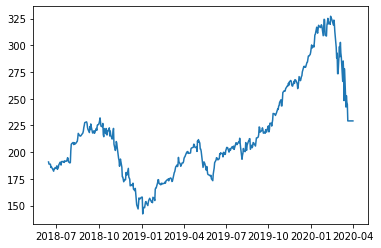

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_test.index, X_test['Close'])

In [ ]:
import keras
y_train=keras.utils.to_categorical(y_train, num_classes=2, dtype='float64')
y_test=keras.utils.to_categorical(y_test, num_classes=2, dtype='float64')
y_test

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy= {0: 250, 1: 250, 2:250, 4:250})
X_train, y_train = oversample.fit_resample(X_train, y_train)


In [ ]:
from sklearn import tree
jk = tree.DecisionTreeClassifier(criterion='gini',min_impurity_decrease=0.8,max_depth=5)
jk = jk.fit(X_train, y_train)


In [ ]:
y_predict=jk.predict(X_test)
np.sum(y_test.flatten()==y_predict.flatten())/len(y_test)

In [ ]:
tree.plot_tree(clf.fit(X_train, y_train)) 

In [ ]:
look_back=90
xtrain=X_train[:look_back]
for i in range(1,len(X_train)-look_back):
  xtrain=np.concatenate((xtrain,X_train[i:i+look_back]), axis=0)
ytrain=y_train[look_back:len(y_train)+1]
xtest=X_test[:look_back]
for i in range(1,len(X_test)-look_back):
  xtest=np.concatenate((xtest,X_test[i:i+look_back]), axis=0)
ytest=y_test[look_back:len(y_test)+1]
xtrain=np.reshape(xtrain,(-1,look_back,xtrain.shape[1]))
xtest=np.reshape(xtest,(-1,look_back,xtest.shape[1]))
ytest=np.reshape(ytest,(-1,ytest.shape[1]))
ytrain=np.reshape(ytrain,(-1,ytrain.shape[1]))

print(xtest.shape,ytest.shape)

(360, 90, 12) (360, 1)


In [ ]:
X_train=np.reshape(X_train,(-1,X_train.shape[1]))
X_test=np.reshape(X_test,(-1,X_test.shape[1]))
y_test=np.reshape(y_test,(-1,y_test.shape[1]))

y_train=np.reshape(y_train,(-1,y_train.shape[1]))
print(len(X_train),len(y_train))

In [ ]:
total.iloc[-3]

In [ ]:
y[y>0.05]=7
y[np.logical_and((y>0.03) ,(y<=0.05))]=6
y[np.logical_and((y>0.01) , (y<=0.03))]=5
y[np.logical_and((y>-0.01) , (y<=0.01))]=4
y[np.logical_and((y>-0.03) , (y<=-0.01))]=3
y[np.logical_and((y>-0.05) , (y<=-0.03))]=2
y[np.logical_and((y>-0.07) , (y<=-0.05))]=1



Try it on RNN

In [ ]:
#Dependencies
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, BatchNormalization,TimeDistributed
from keras import regularizers
import keras

def max_err(y_true, y_pred):
    return keras.backend.max(keras.backend.abs(y_true-y_pred)) 

def top_2_categorical_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=2) 
inputs = tf.keras.Input(shape=xtrain.shape)
# Neural network
embed=64
timedense = Dense(embed)
model = Sequential()
model.add(TimeDistributed(timedense, batch_input_shape=(1,look_back,xtrain.shape[2])))
model.add(LSTM(embed, stateful=True, return_sequences=True,batch_input_shape=(1,look_back,embed)))
model.add(LSTM(embed, stateful=True,  return_sequences=True))
model.add(LSTM(embed, stateful=True, return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(32,activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=0.0004),kernel_initializer='random_uniform'))
model.add(Dropout(0.1))
model.add(Dense(16,activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=0.0004),kernel_initializer='random_uniform'))
model.add(Dense(ytrain.shape[1]))
model.compile(loss='MSE', optimizer=keras.optimizers.Adamax(learning_rate=0.001), metrics=[max_err])
for i in model.layers:
  print(i.input_shape,i.output_shape)


(1, 90, 12) (1, 90, 64)
(1, 90, 64) (1, 90, 64)
(1, 90, 64) (1, 90, 64)
(1, 90, 64) (1, 64)
(1, 64) (1, 64)
(1, 64) (1, 32)
(1, 32) (1, 32)
(1, 32) (1, 16)
(1, 16) (1, 1)


In [ ]:
#Dependencies
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, BatchNormalization
from keras import regularizers
import keras


def top_2_categorical_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=2) 

# Neural network
model = Sequential()
model.add(Dropout(rate=0.1))
model.add(BatchNormalization())
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(128, activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=0.0004, l2=0.002),kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.0004, l2=0.002),kernel_initializer='random_uniform'))
model.add(Dense(32, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.0004, l2=0.002),kernel_initializer='random_uniform'))
model.add(Dropout(rate=0.1))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=True), metrics=['accuracy',top_2_categorical_accuracy])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_2 (TimeDist (1, 90, 64)               832       
_________________________________________________________________
lstm_4 (LSTM)                (1, 90, 64)               33024     
_________________________________________________________________
lstm_5 (LSTM)                (1, 90, 64)               33024     
_________________________________________________________________
lstm_6 (LSTM)                (1, 64)                   33024     
_________________________________________________________________
dropout_3 (Dropout)          (1, 64)                   0         
_________________________________________________________________
dense_6 (Dense)              (1, 32)                   2080      
_________________________________________________________________
dropout_4 (Dropout)          (1, 32)                  

In [ ]:
np.sum(y_train==1)/len(y_train)

In [ ]:
new_train=xtrain[0:16]
new_ytrain=ytrain[0:16]
new_test=xtest[0:16]
new_ytest=ytest[0:16]

In [ ]:
history = model.fit(new_train, new_ytrain, epochs=5, batch_size=1, validation_data=(new_test, new_ytest), verbose=2,)

Train on 16 samples, validate on 16 samples
Epoch 1/5
 - 2s - loss: 75.0654 - max_err: 9.0000 - val_loss: 45547.9648 - val_max_err: 214.2375
Epoch 2/5
 - 1s - loss: 50.3880 - max_err: 9.0000 - val_loss: 44389.7322 - val_max_err: 214.2375
Epoch 3/5
 - 1s - loss: 11.1283 - max_err: 9.0000 - val_loss: 42130.4546 - val_max_err: 214.2375
Epoch 4/5
 - 1s - loss: 1.3751 - max_err: 9.0000 - val_loss: 41839.2437 - val_max_err: 214.2375
Epoch 5/5
 - 1s - loss: 0.4129 - max_err: 9.0000 - val_loss: 42288.5405 - val_max_err: 214.2375


In [ ]:
big=np.concatenate((xtrain, xtest), axis=0)
tryi=np.reshape(big[99],(1,90,12))
predicts=model.predict(tryi)

In [ ]:
xtest[1:5].shape

(4, 90, 12)

In [ ]:
jj=np.random.rand(new_test.shape[0],new_test.shape[1],new_test.shape[2])
predicts=model.predict(jj,1)
predicts

array([[7.796441 ],
       [7.9881983],
       [8.048075 ],
       [7.9617414],
       [7.7100663],
       [7.801682 ],
       [7.8338275],
       [8.0673   ],
       [7.995019 ],
       [7.8818502],
       [7.9421387],
       [7.8965325],
       [7.8409677],
       [7.8866086],
       [7.870923 ],
       [7.725213 ]], dtype=float32)

In [ ]:
predicts

array([[25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],
       [25.481676],


In [ ]:
len(predicts)
len(ytrain)+len(ytest)
truth=np.concatenate((ytrain,ytest),axis=0)


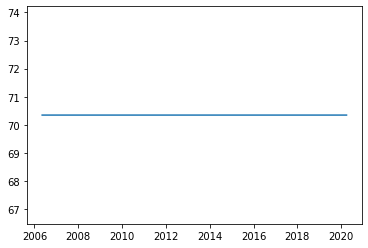

In [ ]:
xaxis=pd.concat([X_train[look_back:len(y_train)+1],X_test[look_back:len(y_test)+1]])
len(xaxis)

plt.plot(xaxis.index, predicts)

In [ ]:
X=np.reshape(X,(-1,1,265))

y=np.reshape(y,(-1,1))
predicts = model.predict(X, batch_size=1)
len(predicts)

In [ ]:
predicts[0]

In [ ]:
restore=np.zeros((len(predicts),1))
for i in range(len(predicts)):
  restore[i]=np.argmax(predicts[i])
restore

In [ ]:
total.iloc[0]['change']

In [ ]:
predicts.flatten()
y_test.flatten()
print(np.sum(np.sign(predicts.flatten())!=np.sign(y.flatten())))
for i in range(len(predicts)):
  print(str(predicts.flatten()[i])+' '+str(y.flatten()[i]))

In [ ]:
restore=MinMaxScaler((total['change'].min(), total['change'].max()))
predicts=restore.fit_transform(predicts)
len(predicts)

In [ ]:
predicts.flatten()
y_test.flatten()
print(np.sum(np.sign(predicts.flatten())!=np.sign(total['change'])))
for i in range(len(predicts)):
  print(str(predicts.flatten()[i])+' '+str(total['change'][i]))

In [ ]:
y_test.append()

In [ ]:
print(outputs)

In [ ]:
dataset=tf.data.Dataset.from_tensor_slices(another)

In [ ]:
dataset.take(5)

In [ ]:
for features in dataset.take(5):
  print ('Features: {}'.format(features))

In [ ]:
 !pip install zipline

     |████████████████████████████████| 2.5MB 8.8MB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
     |████████████████████████████████| 26.3MB 159kB/s 
     |████████████████████████████████| 143kB 46.9MB/s 
     |████████████████████████████████| 1.3MB 45.6MB/s 
     |████████████████████████████████| 624kB 38.1MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 1.1MB 42.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 102kB 11.2MB/s 
  Created wheel for alembic: filename=alembic-1.4.2-cp36-none-any.whl size=159543 sha256=dbfd8bf9948dca43fb1e066ac4c387d7efd24092da0cf5b891f7feeca1d4011e
  Stored in directory: /root/.cache/pip/wheels/1f/04/83/76023f7a4c14688c0b5c2682a96392cfdd3ee4449eaaa287ef
Successfully built alembic
  Created wheel for zipline: fil

In [ ]:
!pip install tensortrade[talib]
from zipline.examples import buyapple